  Listing_Date Property_Type       City        State              Status  \
0   2025-04-13     Apartment      Delhi        Delhi  Under Construction   
1   2024-10-07     Apartment  Bangalore    Karnataka  Under Construction   
2   2025-04-08     Apartment    Kolkata  West Bengal            For Sale   
3   2024-09-07     Penthouse     Jaipur    Rajasthan            For Sale   
4   2025-08-02        Studio     Jaipur    Rajasthan            For Sale   

   Price (INR)  Area (sqft)  
0     20456905         2506  
1     38598928         1212  
2      8287781         2291  
3     39664518         2128  
4     32145908         2778  


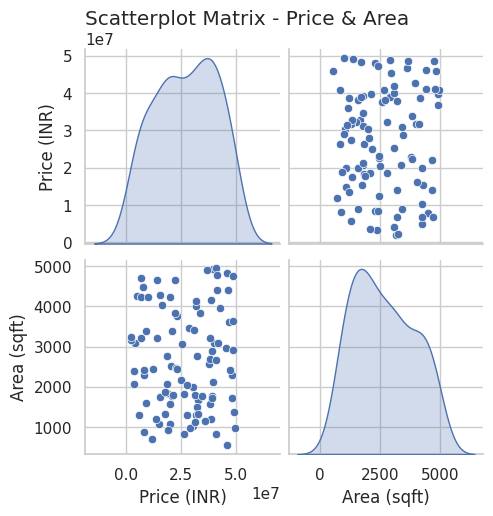

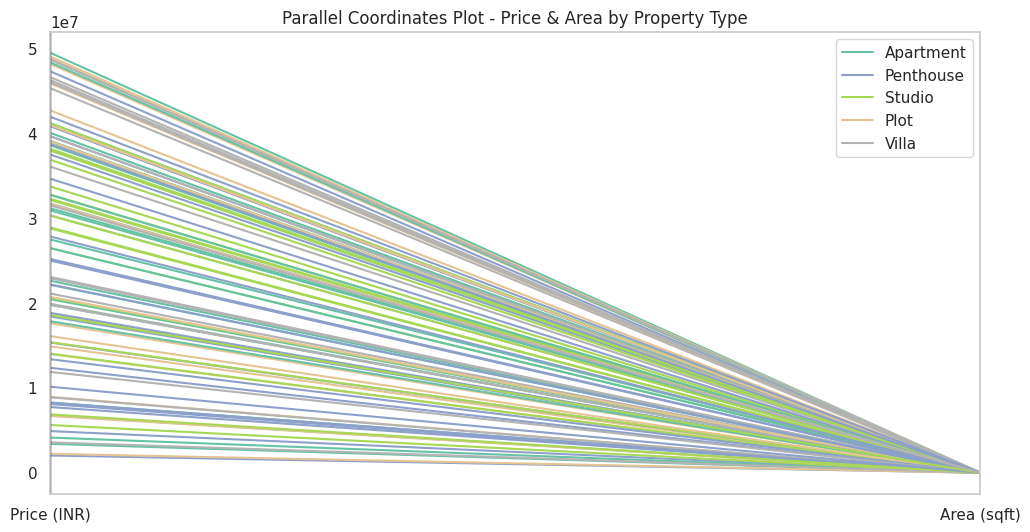

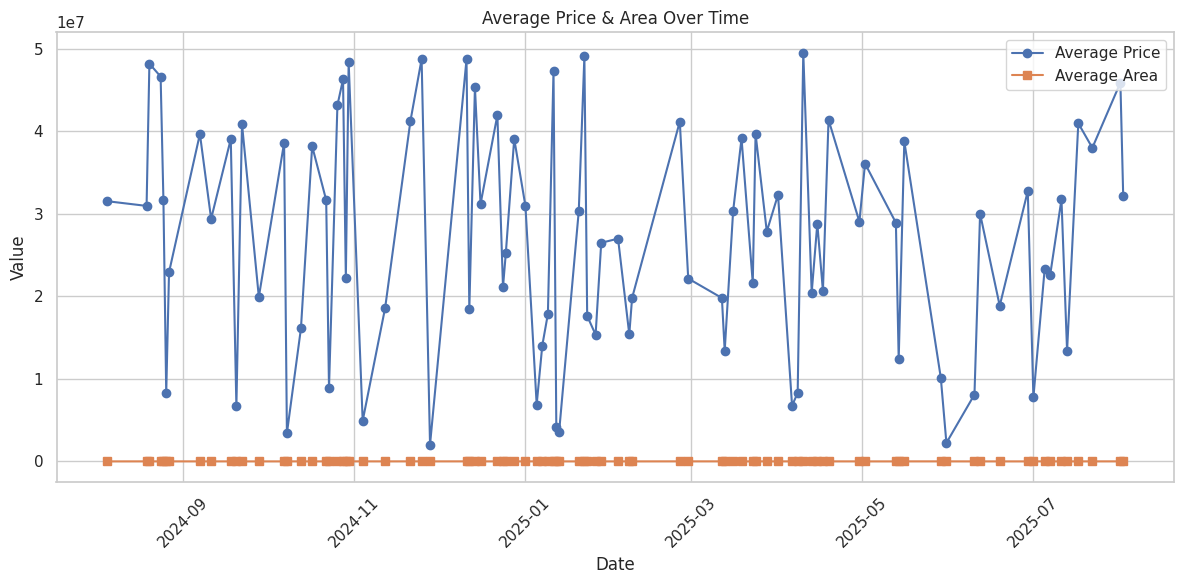

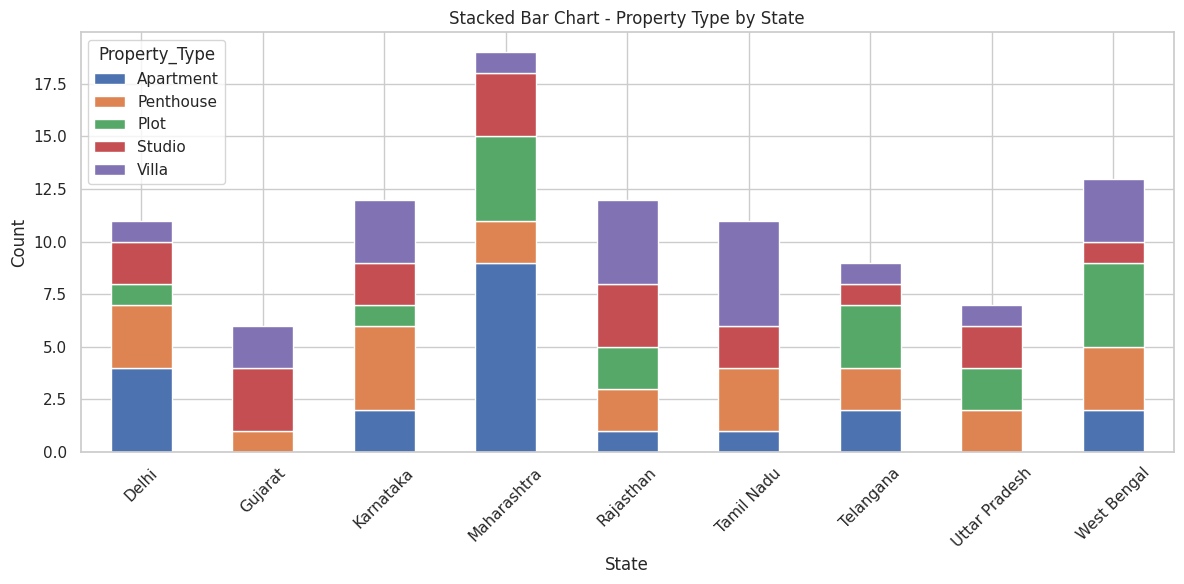

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Step 2: Read CSV file
df = pd.read_csv("real_estate_listings_100.csv")

# Step 3: Convert date and clean data
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'], errors='coerce')
df = df.dropna(subset=['Listing_Date'])  # Remove rows without dates
print(df.head())

# Step 4: Scatterplot Matrix (Price vs Area)
sns.pairplot(df[['Price (INR)', 'Area (sqft)']].dropna(), diag_kind="kde")
plt.suptitle("Scatterplot Matrix - Price & Area", y=1.02)
plt.show()

# Step 5: Parallel Coordinates (Price & Area by Property Type)
df_pc = df[['Price (INR)', 'Area (sqft)', 'Property_Type']].dropna()
df_pc['Property_Type'] = df_pc['Property_Type'].astype(str)
plt.figure(figsize=(12,6))
parallel_coordinates(df_pc, 'Property_Type', colormap=plt.cm.Set2)
plt.title("Parallel Coordinates Plot - Price & Area by Property Type")
plt.show()

# Step 6: Line Graph - Average Price & Area Over Time
df_time = df.groupby('Listing_Date').agg({'Price (INR)':'mean', 'Area (sqft)':'mean'}).reset_index()
df_time = df_time.sort_values('Listing_Date')
plt.figure(figsize=(12,6))
plt.plot(df_time['Listing_Date'], df_time['Price (INR)'], marker='o', label="Average Price")
plt.plot(df_time['Listing_Date'], df_time['Area (sqft)'], marker='s', label="Average Area")
plt.title("Average Price & Area Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Stacked Bar Chart - Property Count by Type & State
property_counts = df.groupby(['State', 'Property_Type']).size().unstack(fill_value=0)
property_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Stacked Bar Chart - Property Type by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# New Section